<a href="https://colab.research.google.com/github/katherine2022Udea/TesisEspecializacion/blob/main/3_1_Experimento_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/UDEA-Esp-Analitica-y-Ciencia-de-Datos/EACD-02-ESTADISTICA/master/init.py
import init; init.init(force_download=False); 
from IPython.display import Image

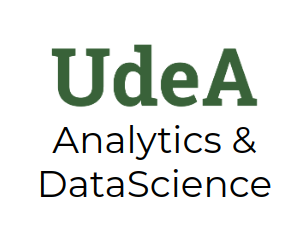

In [6]:
Image("local/imgs/udea-datascience.png")

## **A) Importar Base de Datos**

In [7]:
import numpy as np # Matemetias y Matrices
import pandas as pd # para BD
import matplotlib.pyplot as plt # Graficas
import seaborn as sns # Graficas estadisticas
from scipy.stats import shapiro # Pruebas Estadisticas
from scipy.stats import chi2_contingency # Pruebas de Independencia para Tablas de contingencia
from scipy import stats
### Modelación de Machine Learning
from sklearn.model_selection import train_test_split # Para dividir nuesntra BD en entrenamiento y Test
import statsmodels.api as sm
from scipy.stats import normaltest

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [8]:
url='https://raw.githubusercontent.com/katherine2022Udea/TesisEspecializacion/main/BD_Experimento_II.csv'
df=pd.read_csv(url)

# **4) Modelación**



## **Selección de variables**

In [9]:
Y=df['overall_survival']
X=df.drop("overall_survival",axis=1)
X.shape

(1423, 200)

**División train y test**

Evaluar la capacidad predictiva de un modelo consiste en comprobar cómo de próximas son sus predicciones a los verdaderos valores de la variable respuesta. Para poder cuantificarlo de forma correcta, se necesita disponer de un conjunto de observaciones, de las que se conozca la variable respuesta, pero que el modelo no haya "visto", es decir, que no hayan participado en su ajuste. Con esta finalidad, se dividen los datos disponibles en un conjunto de entrenamiento y un conjunto de test.

Es importante verificar que la distribución de la variable respuesta es similar en el conjunto de entrenamiento y en el de test. Para asegurar que esto se cumple, la función train_test_split() de scikit-learn permite, en problemas de clasificación, identificar con el argumento stratify la variable en base a la cual hacer el reparto.

Este tipo de reparto estratificado asegura que el conjunto de entrenamiento y el de test sean similares en cuanto a la variable respuesta, sin embargo, no garantiza que ocurra lo mismo con los predictores.

In [10]:
x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=0.2,random_state=1214,stratify=Y)

In [11]:
y_train.value_counts()

1    641
0    497
Name: overall_survival, dtype: int64

In [12]:
y_test.value_counts()

1    160
0    125
Name: overall_survival, dtype: int64

In [13]:
print(x_train.shape)
print(x_test.shape)

(1138, 200)
(285, 200)


## **4.1) Árboles de decisión con Python:clasificación**

In [14]:
#!pip install --upgrade scikit-learn

In [15]:
# Modelo
from sklearn.tree import DecisionTreeClassifier
# Graficos
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text

# Para optimizar Modelos, Fase validacion
from sklearn.model_selection import GridSearchCV
# evaluar modelos
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import  metrics
from sklearn.metrics import precision_recall_fscore_support as score

**Creamos la funcion o modelo**

In [16]:
Modelo1=DecisionTreeClassifier( max_depth=7,criterion = 'gini',random_state= 123) # profundidad hiperparametro a optimizar
Modelo1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=7, random_state=123)

**Grafico**

Profundidad del árbol: 7
Número de nodos terminales: 53


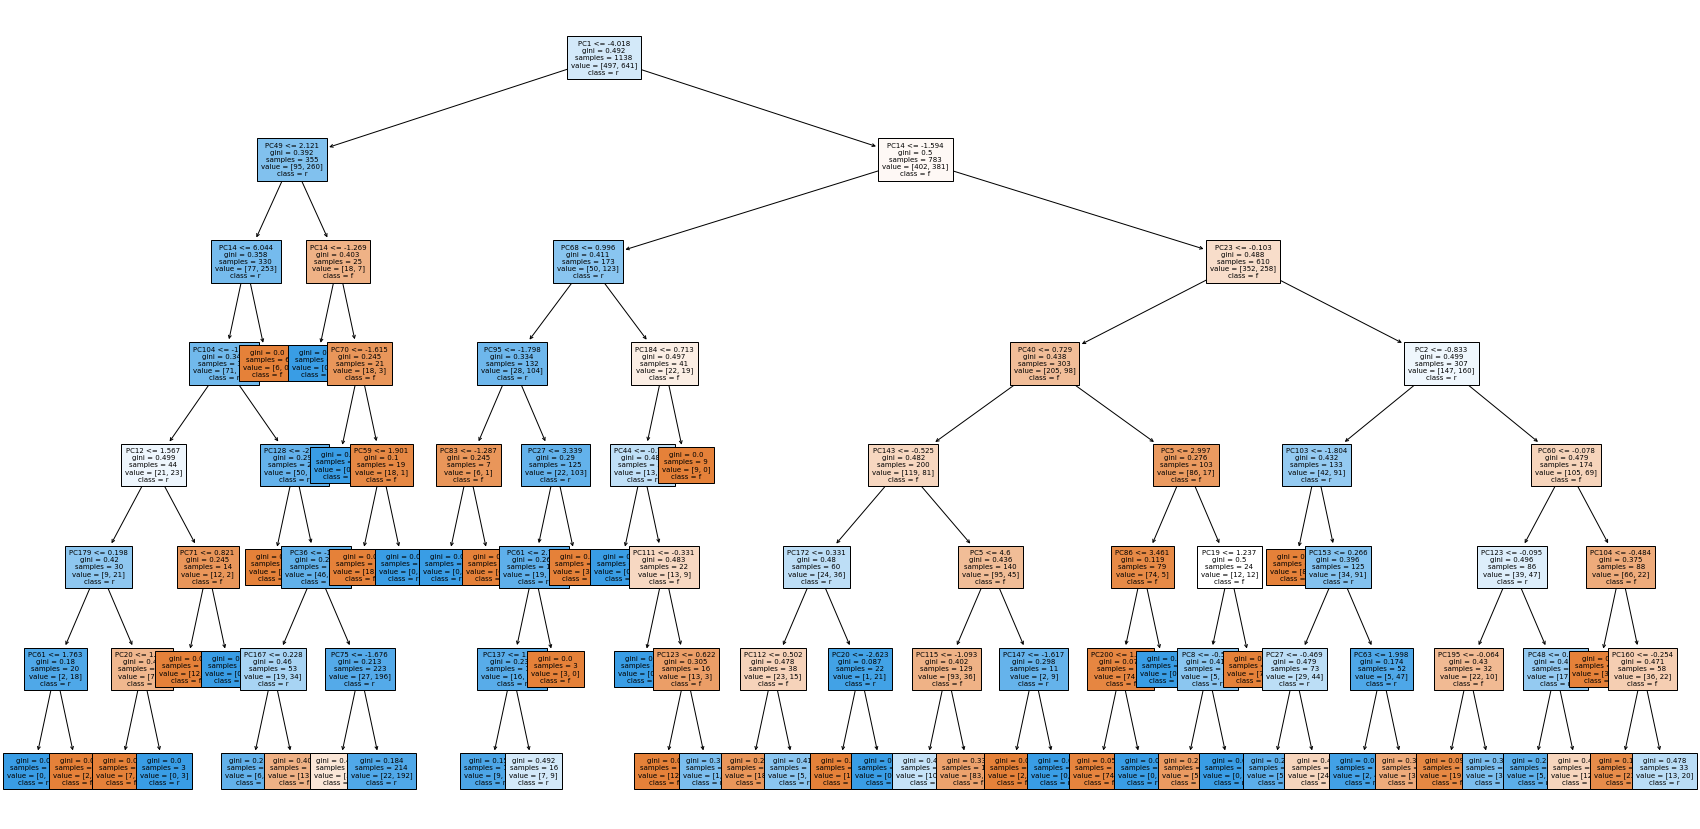

In [17]:
fig, ax = plt.subplots(figsize=(30, 15))
print(f"Profundidad del árbol: {Modelo1.get_depth()}")
print(f"Número de nodos terminales: {Modelo1.get_n_leaves()}")
plot=plot_tree(decision_tree=Modelo1,
              feature_names=x_train.columns,
                filled        = True,
               fontsize      = 7,
              class_names="fraud",
                ax            = ax
              )

### **Predicción y evaluación del modelo**

In [18]:
predicciones_train=Modelo1.predict(X=x_train)
predicciones_train

array([1, 1, 0, ..., 0, 1, 0])

In [19]:
# train
metrics.accuracy_score(y_train,predicciones_train)

0.8655536028119508

In [20]:
predicciones_test=Modelo1.predict(X=x_test)
Probabilidad_test_M1=Modelo1.predict_proba(X=x_test)

In [21]:
# train
metrics.accuracy_score(y_train,predicciones_train)

0.8655536028119508

In [22]:
# test
Accuracy_AD_VS_DD=metrics.accuracy_score(y_test,predicciones_test)
print(Accuracy_AD_VS_DD)

0.543859649122807


In [23]:
Reporte_AD_VS_DD=metrics.classification_report(y_test,predicciones_test)

print(Reporte_AD_VS_DD)

              precision    recall  f1-score   support

           0       0.48      0.40      0.43       125
           1       0.58      0.66      0.62       160

    accuracy                           0.54       285
   macro avg       0.53      0.53      0.53       285
weighted avg       0.54      0.54      0.54       285



In [24]:
precision, recall, fscore, support = score(y_test,predicciones_test)
f1_Score_AD_0=fscore[0]
f1_Score_AD_1=fscore[1]
print(f1_Score_AD_0)
print(f1_Score_AD_1)

0.43478260869565216
0.6176470588235293


### **Matrix de Confusión**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()


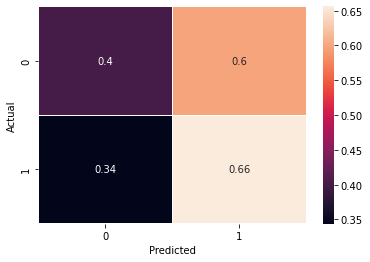

In [25]:
data1 = {"y_Actual":y_test,
        "y_Predicted": Modelo1.predict(x_test)
        }

df = pd.DataFrame(data1, columns=['y_Actual','y_Predicted'])
confusion_matrix1 = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

#sns.heatmap(confusion_matrix,annot=True,fmt='g')
#plt.show()

confusion_matrix_Normalizada=confusion_matrix1.astype('float') / confusion_matrix1.sum(axis=1)[:, np.newaxis]
sns.heatmap(confusion_matrix_Normalizada, annot=True,linewidths = 0.01)
plt.show()

### **Podando del árbol (pruning)**



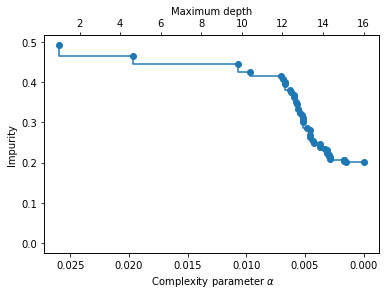

In [26]:
f=Modelo1
f.get_n_leaves() # number of leaves of the tree
f.get_depth()    # depth of the tree

f_alpha = f.cost_complexity_pruning_path(x_train, y_train)
alphas = f_alpha['ccp_alphas']
impurs = f_alpha['impurities']
fs = []
for j in alphas:
    f = DecisionTreeClassifier(ccp_alpha=j, random_state=77)
    f.fit(x_train, y_train)
    fs.append(f)
fs
nodes = []
depth = []
for j in range(0, alphas.shape[0]):
    nodes.append(fs[j].tree_.node_count)
    depth.append(fs[j].tree_.max_depth)

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plt.plot(alphas, impurs, marker='o', drawstyle='steps-post')
ax.invert_xaxis()
plt.xlabel(r' Complexity parameter $\alpha$')
plt.ylabel('Impurity')
ax1 = ax.twiny()
#plt.plot(nodes, alphas, marker='o', drawstyle='steps-post', color='w')
#plt.xlabel('No. of terminal nodes')
plt.plot(depth, alphas, marker='o', drawstyle="steps-post", color='w')
plt.xlabel('Maximum depth')
plt.show()


results = {'alpha': alphas, 'Imputiry': impurs, 'Nodes': nodes, 'Depth': depth}
results = pd.DataFrame(results, columns = ['alpha', 'Imputiry', 'Nodes', 'Depth'])

**Accuracy vs alpha para training y testing**

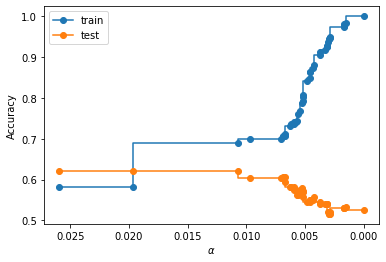

In [27]:
train_scores = [f.score(x_train, y_train) for f in fs]
test_scores  = [f.score(x_test, y_test)   for f in fs]

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel('Accuracy')
#ax.set_title(r'Accuracy vs $\alpha$')
ax.plot(alphas, train_scores, marker='o', label='train', drawstyle='steps-post')
ax.plot(alphas, test_scores,  marker='o', label='test',  drawstyle='steps-post')
ax.invert_xaxis()
ax.legend()
plt.show()

#### **Validacion Cruzada**

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [29]:
f = Modelo1
max_depth = range(1, 8, 1)
min_samples_leaf = range(1, 10, 1)
param_grid = dict(max_depth = max_depth , min_samples_leaf = min_samples_leaf)
kfold = KFold(n_splits=10, shuffle=False, random_state=None)
grid_search = GridSearchCV(f, param_grid, scoring = 'accuracy', n_jobs = -1, cv = kfold, verbose = 0)
grid_result = grid_search.fit(x_train, y_train)


print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
params = grid_result.cv_results_['params']
for mean, param in zip(means, params):
    print('%f with: %r' % (mean, param))

Best: 0.630935 using {'max_depth': 2, 'min_samples_leaf': 8}
0.561582 with: {'max_depth': 1, 'min_samples_leaf': 1}
0.561582 with: {'max_depth': 1, 'min_samples_leaf': 2}
0.561582 with: {'max_depth': 1, 'min_samples_leaf': 3}
0.561582 with: {'max_depth': 1, 'min_samples_leaf': 4}
0.561582 with: {'max_depth': 1, 'min_samples_leaf': 5}
0.561582 with: {'max_depth': 1, 'min_samples_leaf': 6}
0.561582 with: {'max_depth': 1, 'min_samples_leaf': 7}
0.561582 with: {'max_depth': 1, 'min_samples_leaf': 8}
0.561582 with: {'max_depth': 1, 'min_samples_leaf': 9}
0.630057 with: {'max_depth': 2, 'min_samples_leaf': 1}
0.630057 with: {'max_depth': 2, 'min_samples_leaf': 2}
0.630057 with: {'max_depth': 2, 'min_samples_leaf': 3}
0.630057 with: {'max_depth': 2, 'min_samples_leaf': 4}
0.630057 with: {'max_depth': 2, 'min_samples_leaf': 5}
0.630057 with: {'max_depth': 2, 'min_samples_leaf': 6}
0.630057 with: {'max_depth': 2, 'min_samples_leaf': 7}
0.630935 with: {'max_depth': 2, 'min_samples_leaf': 8}
0.63

**Pruned tree**

In [30]:


f = DecisionTreeClassifier(
                           criterion='gini',    # 'gini' or 'entropy' impurity functions
                          max_depth=5,         # maximum depth of the tree
                          min_samples_leaf=3, 
                          ccp_alpha=0.000,
                           random_state=77
                          )

f = f.fit(x_train, y_train)

print(f)
print('Depth:', f.get_depth())            # depth of the tree
print('No. of leaves:', f.get_n_leaves()) # number of leaves of the tree

# rules of the decision tree
feature_names = list(x_train.columns) # features' names to plot the tree
ft = export_text(f, feature_names=feature_names)
#print(ft)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=3, random_state=77)
Depth: 5
No. of leaves: 23


**Tree plot**

Profundidad del árbol: 5
Número de nodos terminales: 23


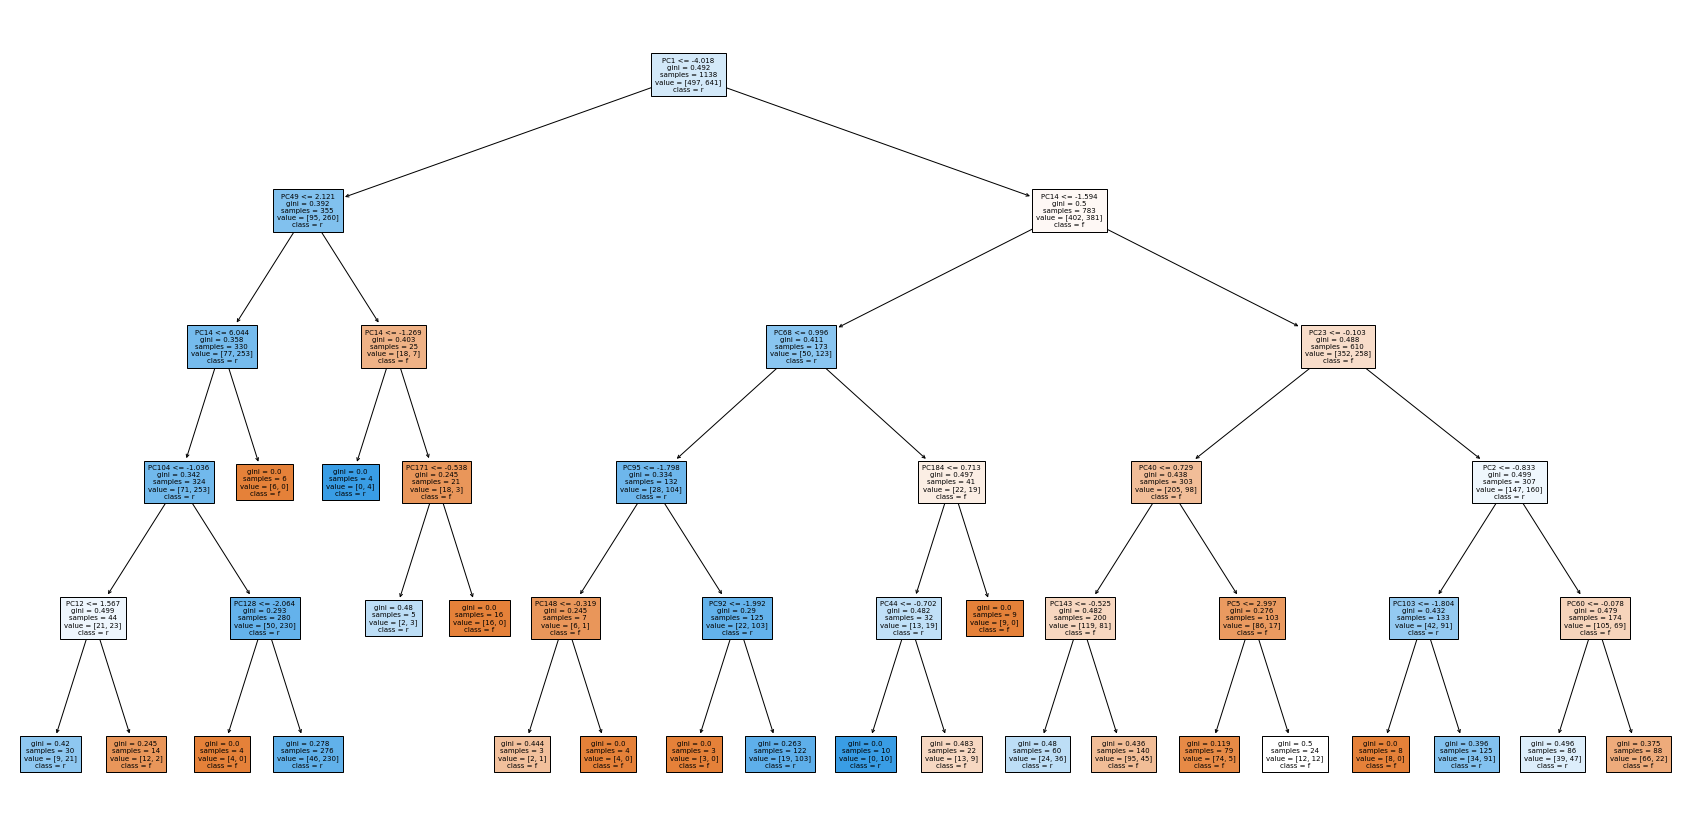

In [31]:
ig, ax = plt.subplots(figsize=(30, 15))
print(f"Profundidad del árbol: {f.get_depth()}")
print(f"Número de nodos terminales: {f.get_n_leaves()}")
plot=plot_tree(decision_tree=f,
              feature_names=x_train.columns,
                filled        = True,
               fontsize      = 7,
              class_names="fraud",
                ax            = ax
              )

**Evaluamos Prediccion**

In [32]:
predicciones_train=f.predict(X=x_train)
predicciones_train

array([1, 1, 0, ..., 1, 1, 1])

In [33]:
predicciones_test=f.predict(X=x_test)
Probabilidad_test_M2=f.predict_proba(X=x_test)

In [34]:
Accuray_train_Optimo=metrics.accuracy_score(y_train,predicciones_train)
Accuray_test_Optimo=metrics.accuracy_score(y_test,predicciones_test)
print(Accuray_train_Optimo)
print(Accuray_test_Optimo)

0.7636203866432337
0.543859649122807


In [35]:
precision, recall, fscore, support = score(y_test,predicciones_test)
f1_Score_AD1_0=fscore[0]
f1_Score_AD1_1=fscore[1]

In [36]:
Reporte_AD_Optimo=metrics.classification_report(y_test,predicciones_test)
print(Reporte_AD_Optimo)

              precision    recall  f1-score   support

           0       0.47      0.34      0.40       125
           1       0.58      0.70      0.63       160

    accuracy                           0.54       285
   macro avg       0.52      0.52      0.52       285
weighted avg       0.53      0.54      0.53       285



## **Matrix Confusion**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()


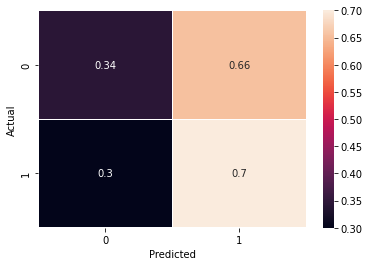

In [37]:
data2 = {"y_Actual":y_test,
        "y_Predicted": f.predict(x_test)
        }

df = pd.DataFrame(data2, columns=['y_Actual','y_Predicted'])
confusion_matrix2 = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

#sns.heatmap(confusion_matrix,annot=True,fmt='g')
#plt.show()

confusion_matrix_Normalizada1=confusion_matrix2.astype('float') / confusion_matrix2.sum(axis=1)[:, np.newaxis]
sns.heatmap(confusion_matrix_Normalizada1, annot=True,linewidths = 0.01)
plt.show()

In [38]:
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")

importancia_predictores = pd.DataFrame(
                            {'predictor': x_train.columns,
                             'importancia': f.feature_importances_}
                            )
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
13,PC14,0.187034
0,PC1,0.160089
1,PC2,0.067663
22,PC23,0.064681
48,PC49,0.059707
...,...,...
73,PC74,0.000000
74,PC75,0.000000
75,PC76,0.000000
76,PC77,0.000000


PC14     0.187034
PC1      0.160089
PC2      0.067663
PC23     0.064681
PC49     0.059707
PC103    0.043226
PC40     0.042463
PC60     0.041481
PC5      0.038082
PC104    0.036802
PC68     0.035726
PC143    0.035356
PC95     0.033362
PC12     0.032141
PC128    0.029702
dtype: float64


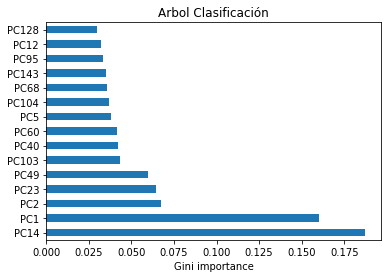

In [39]:
import matplotlib.pyplot as plt

feat_importances = pd.Series(f.feature_importances_, index=x_train.columns)

feat_importances = feat_importances.sort_values(ascending=False)
print(feat_importances.head(15))

feat_importances.nlargest(15).plot(kind='barh', color='#1f77b4')
plt.xlabel('Gini importance')
plt.title("Arbol Clasificación")
#plt.ylabel('Feature')
plt.show()

## **4.2) Random Forest**

In [40]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
                           criterion='gini',    # 'entropy'
                           max_depth=None,      # maximum depth of the tree
                           min_samples_split=3, # minimum number of samples required to split an internal node
                           min_samples_leaf=1,  # minimum number of samples required to be at a leaf node
                           max_leaf_nodes=None,
                           #
                           n_estimators=100, ################################### Cuantos Arboles?
                           max_features='auto', # 'auto', then max_features=sqrt(n_features)
                           bootstrap=True,
                           oob_score=False,
                           random_state=77
                           )

rf = rf.fit(x_train, y_train)
rf

RandomForestClassifier(min_samples_split=3, random_state=77)

**Evaluación del Modelo**

In [41]:
predicciones_train=rf.predict(X=x_train)
predicciones_test=rf.predict(X=x_test)

Accuray_train_RF=metrics.accuracy_score(y_train,predicciones_train)
Accuray_test_RF=metrics.accuracy_score(y_test,predicciones_test)
print(Accuray_train_RF)
print(Accuray_test_RF)

1.0
0.6701754385964912


In [42]:
Probabilidad_test_M3=rf.predict_proba(X=x_test)

In [43]:
Reporte_RF=metrics.classification_report(y_test,predicciones_test)
print(Reporte_RF)

              precision    recall  f1-score   support

           0       0.74      0.38      0.51       125
           1       0.65      0.89      0.75       160

    accuracy                           0.67       285
   macro avg       0.69      0.64      0.63       285
weighted avg       0.69      0.67      0.64       285



In [44]:
precision, recall, fscore, support = score(y_test,predicciones_test)
f1_Score_RF_0=fscore[0]
f1_Score_RF_1=fscore[1]
print(f1_Score_RF_0)
print(f1_Score_RF_1)

0.505263157894737
0.7526315789473683


## **Matrix Confusión**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()


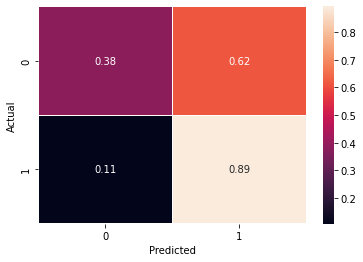

In [45]:
data3 = {"y_Actual":y_test,
        "y_Predicted": rf.predict(x_test)
        }

df = pd.DataFrame(data3, columns=['y_Actual','y_Predicted'])
confusion_matrix3 = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

#sns.heatmap(confusion_matrix,annot=True,fmt='g')
#plt.show()

confusion_matrix_Normalizada2=confusion_matrix3.astype('float') / confusion_matrix3.sum(axis=1)[:, np.newaxis]
sns.heatmap(confusion_matrix_Normalizada2, annot=True,linewidths = 0.01)
plt.show()

### **Optimización de Hiperparametros**

In [46]:
from sklearn.model_selection import GridSearchCV, KFold

# define grid search
B = 50 # Costo computacional, recomiendo mas 50
b = range(1, B + 1)


grid = dict(n_estimators=b)
kfold = KFold(n_splits=5, shuffle=False, random_state=None)
grid_search = GridSearchCV(estimator=rf, param_grid=grid, n_jobs=-1, cv=kfold, scoring='accuracy')
grid_result = grid_search.fit(x_train, y_train)



# summarize results
print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
params = grid_result.cv_results_['params']
for mean, param in zip(means, params):
    print('%f with: %r' % (mean, param))

Best: 0.631834 using {'n_estimators': 39}
0.539524 with: {'n_estimators': 1}
0.531610 with: {'n_estimators': 2}
0.555367 with: {'n_estimators': 3}
0.549246 with: {'n_estimators': 4}
0.597538 with: {'n_estimators': 5}
0.572061 with: {'n_estimators': 6}
0.567675 with: {'n_estimators': 7}
0.575582 with: {'n_estimators': 8}
0.589655 with: {'n_estimators': 9}
0.593168 with: {'n_estimators': 10}
0.601082 with: {'n_estimators': 11}
0.604606 with: {'n_estimators': 12}
0.597569 with: {'n_estimators': 13}
0.612528 with: {'n_estimators': 14}
0.599335 with: {'n_estimators': 15}
0.598450 with: {'n_estimators': 16}
0.607230 with: {'n_estimators': 17}
0.609869 with: {'n_estimators': 18}
0.607234 with: {'n_estimators': 19}
0.606345 with: {'n_estimators': 20}
0.606334 with: {'n_estimators': 21}
0.622158 with: {'n_estimators': 22}
0.615144 with: {'n_estimators': 23}
0.619515 with: {'n_estimators': 24}
0.610743 with: {'n_estimators': 25}
0.617756 with: {'n_estimators': 26}
0.601074 with: {'n_estimators':

In [47]:
from sklearn.ensemble import RandomForestClassifier

f = RandomForestClassifier(
                           criterion='gini',    # 'entropy'
                           max_depth=None,      # maximum depth of the tree
                           min_samples_split=3, # minimum number of samples required to split an internal node
                           min_samples_leaf=1,  # minimum number of samples required to be at a leaf node
                           #                       
                           n_estimators=35,
                           max_features='auto', # 'auto', then max_features=sqrt(n_features)
                           bootstrap=True,
                           oob_score=True,
                           random_state=77
                          )

oob_error   = []
train_error = []
test_error  = []
for b in range(1, B + 1):
    f.set_params(n_estimators = b)
    f.fit(x_train, y_train)
    # errors
    oob_error.append(1 - f.oob_score_)
    train_error.append(1 - f.score(x_train, y_train))
    test_error.append(1 - f.score(x_test, y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. Thi

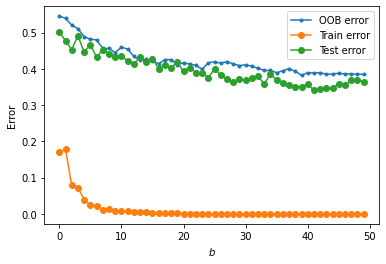

In [48]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.set_xlabel(r'$b$')
ax.set_ylabel('Error')
ax.plot(oob_error, marker='.', label='OOB error')
ax.plot(train_error, marker='o', label='Train error')
ax.plot(test_error, marker='o', label='Test error')
ax.legend()
plt.show()

**Random Forest Optimo**

In [49]:
import numpy as np

f = RandomForestClassifier(
                           criterion='gini',    # 'entropy'
                           max_depth=None,      # maximum depth of the tree
                           min_samples_split=3, # minimum number of samples required to split an internal node
                           min_samples_leaf=1,  # minimum number of samples required to be at a leaf node
                           #                       
                           n_estimators=35,
                           max_features='auto', # 'auto', then max_features=sqrt(n_features)
                           bootstrap=True,
                           oob_score=True,
                           random_state=77
                          )

f = f.fit(x_train, y_train)

In [50]:
# ------------------------------------------------------------------------------
modelo_final = f#grid_result.best_estimator_
modelo_final 

RandomForestClassifier(min_samples_split=3, n_estimators=35, oob_score=True,
                       random_state=77)

In [51]:
predicciones_train=modelo_final.predict(X=x_train)
predicciones_test=modelo_final.predict(X=x_test)

Accuray_train_RF_O=metrics.accuracy_score(y_train,predicciones_train)
Accuray_test_RF_O=metrics.accuracy_score(y_test,predicciones_test)
print(Accuray_train_RF_O)
print(Accuray_test_RF_O)

1.0
0.6140350877192983


In [52]:
Probabilidad_test_M4=modelo_final.predict_proba(X=x_test)

In [53]:
Reporte_RF_O=metrics.classification_report(y_test,predicciones_test)
print(Reporte_RF_O)

              precision    recall  f1-score   support

           0       0.61      0.34      0.44       125
           1       0.62      0.82      0.71       160

    accuracy                           0.61       285
   macro avg       0.61      0.58      0.57       285
weighted avg       0.61      0.61      0.59       285



In [54]:
precision, recall, fscore, support = score(y_test,predicciones_test)
f1_Score_RF1_0=fscore[0]
f1_Score_RF1_1=fscore[1]
print(f1_Score_RF1_0)
print(f1_Score_RF1_1)

0.4387755102040816
0.7058823529411763


## **Matrix confusion**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()


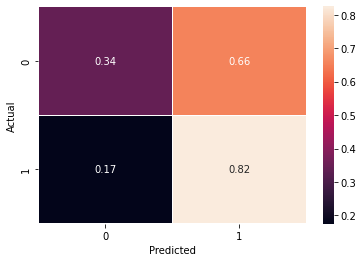

In [55]:
data4 = {"y_Actual":y_test,
        "y_Predicted": modelo_final.predict(x_test)
        }

df = pd.DataFrame(data4, columns=['y_Actual','y_Predicted'])
confusion_matrix4 = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

#sns.heatmap(confusion_matrix,annot=True,fmt='g')
#plt.show()

confusion_matrix_Normalizada3=confusion_matrix4.astype('float') / confusion_matrix4.sum(axis=1)[:, np.newaxis]
sns.heatmap(confusion_matrix_Normalizada3, annot=True,linewidths = 0.01)
plt.show()

**Importancia de Variables**

PC14     0.023416
PC5      0.018205
PC1      0.018133
PC2      0.014582
PC23     0.014293
PC27     0.013302
PC132    0.010193
PC195    0.010115
PC8      0.008758
PC75     0.008544
PC39     0.008409
PC16     0.007998
PC26     0.007977
PC145    0.007897
PC126    0.007745
dtype: float64


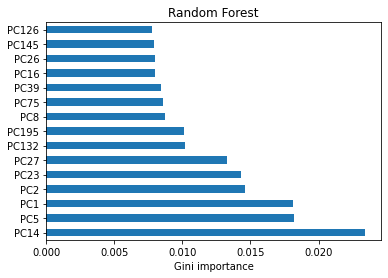

In [56]:
import matplotlib.pyplot as plt

feat_importances = pd.Series(modelo_final.feature_importances_, index=x_train.columns)

feat_importances = feat_importances.sort_values(ascending=False)
print(feat_importances.head(15))

feat_importances.nlargest(15).plot(kind='barh', color='#1f77b4')
plt.xlabel('Gini importance')
plt.title("Random Forest")
#plt.ylabel('Feature')
plt.show()

In [57]:
VariablesImportance=feat_importances.head(15).index.to_list()

## **4.3) Boosting**

### **A) Gradient Boosting**




In [58]:
x_train=x_train[VariablesImportance]
x_test=x_test[VariablesImportance]

In [59]:
from sklearn.ensemble import GradientBoostingClassifier
Modelo_GBC=GradientBoostingClassifier( max_depth=7,
                                      loss="deviance",
                                      n_estimators=20, # Recomiendo
                                      learning_rate=1.0,
                                      random_state=77# semilla 
                                     )

Modelo_GBC.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=7, n_estimators=20,
                           random_state=77)

**Poder de Prediccion**

In [60]:
predicciones_train=Modelo_GBC.predict(X=x_train)
predicciones_test=Modelo_GBC.predict(X=x_test)
Accuray_train_GBC=metrics.accuracy_score(y_train,predicciones_train)
Accuray_test_GBC=metrics.accuracy_score(y_test,predicciones_test)
print(Accuray_train_GBC)
print(Accuray_test_GBC)

1.0
0.6210526315789474


In [61]:
Probabilidad_test_M5=Modelo_GBC.predict_proba(X=x_test)

In [62]:
Reporte_GBC_O=metrics.classification_report(y_test,predicciones_test)
print(Reporte_GBC_O)

              precision    recall  f1-score   support

           0       0.57      0.55      0.56       125
           1       0.66      0.68      0.67       160

    accuracy                           0.62       285
   macro avg       0.61      0.61      0.61       285
weighted avg       0.62      0.62      0.62       285



In [63]:
precision, recall, fscore, support = score(y_test,predicciones_test)
f1_Score_B_0=fscore[0]
f1_Score_B_1=fscore[1]
print(f1_Score_B_0)
print(f1_Score_B_1)

0.5609756097560975
0.6666666666666667


## **Matrix Confusion**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if sys.path[0] == '':


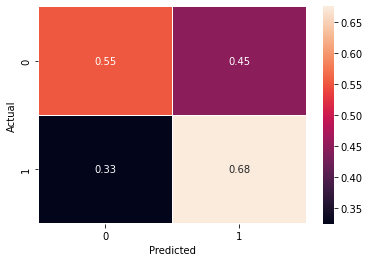

In [64]:
data5 = {"y_Actual":y_test,
        "y_Predicted": Modelo_GBC.predict(X=x_test)
        }

df = pd.DataFrame(data5, columns=['y_Actual','y_Predicted'])

confusion_matrix5 = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

#sns.heatmap(confusion_matrix,annot=True,fmt='g')
#plt.show()

confusion_matrix_Normalizada4=confusion_matrix5.astype('float') / confusion_matrix5.sum(axis=1)[:, np.newaxis]
sns.heatmap(confusion_matrix_Normalizada4, annot=True,linewidths = 0.01)
plt.show()


## **4.4) Logit (Inferencia)**



In [65]:
x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=0.2,random_state=1234,stratify=Y)

In [66]:
import statsmodels.api as sm # statsmodels Seres Tiempo
import statsmodels.formula.api as smf
from statsmodels.stats.weightstats import ttest_ind

In [67]:
x_train_1=sm.add_constant(x_train,prepend=True)
x_test_1=sm.add_constant(x_test,prepend=True)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


**Modelo Logit**

In [68]:
Modelo_Logit=sm.Logit(endog=y_train,exog=x_train_1)

**Selección de Variables**

Selección univariante Las pruebas estadísticas se pueden utilizar para seleccionar aquellas características que tienen la relación más fuerte con la variable de salida. La biblioteca scikit-learn proporciona la clase SelectKBest que se puede usar con un conjunto de diferentes pruebas estadísticas para seleccionar un número específico de características.

In [69]:
x_train.shape[1]

200

In [70]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,mutual_info_classif

In [71]:
pd.set_option('display.float_format','{:.2f}'.format)
Mejores_Variables=SelectKBest(score_func=mutual_info_classif,k=x_train.shape[1])
fit=Mejores_Variables.fit(x_train,y_train)
df_puntajes=pd.DataFrame(fit.scores_)
df_Columnas=pd.DataFrame(x_train.columns)
df_completo=pd.concat([df_Columnas,df_puntajes],axis=1)
df_completo.columns=["Variable","Puntaje"]
#################################################### Seleccion 10 Variables ######################
td=df_completo.nlargest(10,"Puntaje")
td

,Variable,Puntaje
14,PC15,0.04
0,PC1,0.04
12,PC13,0.04
152,PC153,0.03
148,PC149,0.03
28,PC29,0.03
61,PC62,0.03
110,PC111,0.03
166,PC167,0.03
4,PC5,0.03


In [72]:
Variables=td["Variable"].values
Variables

array(['PC15', 'PC1', 'PC13', 'PC153', 'PC149', 'PC29', 'PC62', 'PC111',
       'PC167', 'PC5'], dtype=object)

In [73]:
x_train_Seleccion_V=x_train[VariablesImportance]
x_test_Seleccion_V=x_test[VariablesImportance]

In [74]:
x_train_1=sm.add_constant(x_train_Seleccion_V,prepend=True)
x_test_1=sm.add_constant(x_test_Seleccion_V,prepend=True)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [75]:
Modelo_Logit=sm.Logit(endog=y_train,exog=x_train_1)
Modelo_Logit=Modelo_Logit.fit()# method='bfgs

Optimization terminated successfully.
         Current function value: 0.587560
         Iterations 5


In [76]:
print(Modelo_Logit.summary2())

                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.142     
Dependent Variable: overall_survival AIC:              1369.2876 
Date:               2022-05-28 22:32 BIC:              1449.8800 
No. Observations:   1138             Log-Likelihood:   -668.64   
Df Model:           15               LL-Null:          -779.67   
Df Residuals:       1122             LLR p-value:      6.8002e-39
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
const      0.3216     0.0667    4.8186   0.0000    0.1908    0.4524
PC14      -0.2058     0.0314   -6.5483   0.0000   -0.2675   -0.1442
PC5        0.1084     0.0183    5.9279   0.0000    0.0726    0.1443
PC1       -0.0570     0.

**Evaluación**

In [77]:
Probabilidad_test=Modelo_Logit.predict(exog=x_test_1)
Predicciones_test=np.where(Probabilidad_test < 0.5,0,1)
Accuracy_Log_test=metrics.accuracy_score(y_test,Predicciones_test)
print(Accuracy_Log_test)
Reporte_Log_test=metrics.classification_report(y_test,Predicciones_test)
print(Reporte_Log_test)
precision, recall, fscore, support = score(y_test,Predicciones_test)
f1_Score_Log1_0=fscore[0]
f1_Score_Log1_1=fscore[1]
print(f1_Score_Log1_0)
print(f1_Score_Log1_1)

0.712280701754386
              precision    recall  f1-score   support

           0       0.70      0.60      0.65       125
           1       0.72      0.80      0.76       160

    accuracy                           0.71       285
   macro avg       0.71      0.70      0.70       285
weighted avg       0.71      0.71      0.71       285

0.6465517241379309
0.7573964497041421


## **Matrix de Confusión**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if sys.path[0] == '':


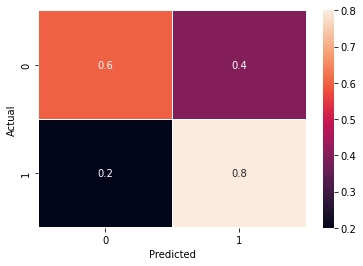

In [78]:
data6 = {"y_Actual":y_test,
        "y_Predicted": Predicciones_test
        }

df = pd.DataFrame(data6, columns=['y_Actual','y_Predicted'])

confusion_matrix6 = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

#sns.heatmap(confusion_matrix,annot=True,fmt='g')
#plt.show()

confusion_matrix_Normalizada5=confusion_matrix6.astype('float') / confusion_matrix6.sum(axis=1)[:, np.newaxis]
sns.heatmap(confusion_matrix_Normalizada5, annot=True,linewidths = 0.01)
plt.show()

# **5) Evaluación de Modelos**

## **Tabla Metricas**

In [79]:
df_comparacion_Modelos=pd.DataFrame({
    "Modelos":["Árbol de decisión","Arbol Optimizado","RandomForest","RandomForestOptimo","GradientBoosting","RegresionLogistica"],
    "Accuracy":[Accuracy_AD_VS_DD,Accuray_test_Optimo,Accuray_test_RF,Accuray_test_RF_O,Accuray_test_GBC,Accuracy_Log_test],
    "f1_0":[f1_Score_AD_0,f1_Score_AD1_0,f1_Score_RF_0,f1_Score_RF1_0,f1_Score_B_0,f1_Score_Log1_0],
    "f1_1":[f1_Score_AD_1,f1_Score_AD1_1,f1_Score_RF_1,f1_Score_RF1_1,f1_Score_B_1,f1_Score_Log1_1]})
df_comparacion_Modelos.sort_values("Accuracy",ascending=False)

,Modelos,Accuracy,f1_0,f1_1
5,RegresionLogistica,0.71,0.65,0.76
2,RandomForest,0.67,0.51,0.75
4,GradientBoosting,0.62,0.56,0.67
3,RandomForestOptimo,0.61,0.44,0.71
0,Árbol de decisión,0.54,0.43,0.62
1,Arbol Optimizado,0.54,0.40,0.63


## **Graficas Matrix de Confusion**

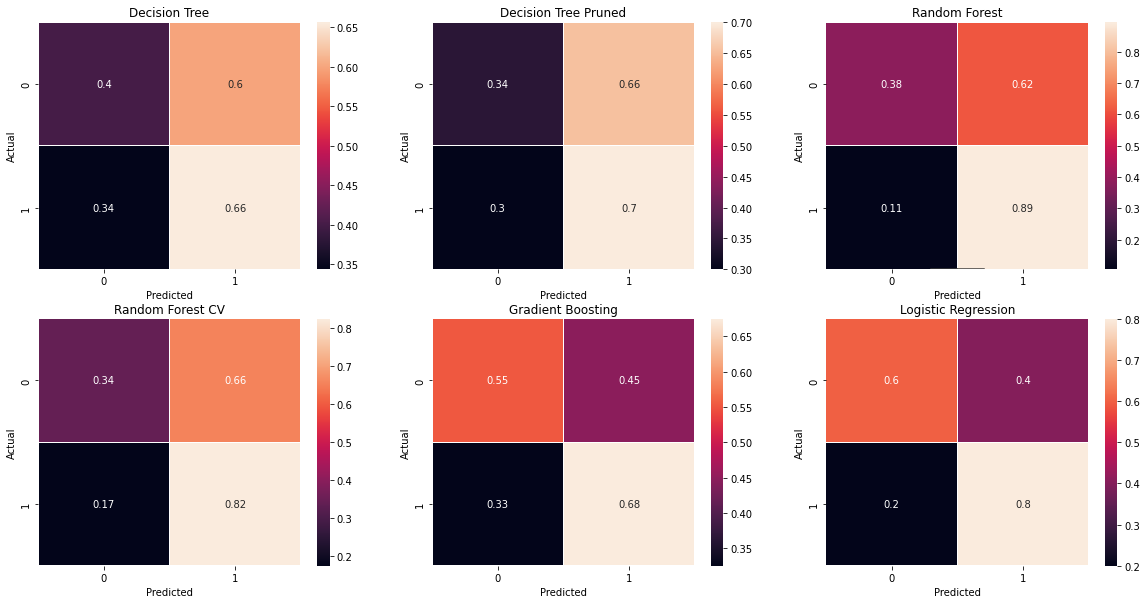

In [80]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
 
#fig.suptitle('confusion matrix')
 
iris = sns.load_dataset("iris")
 

sns.heatmap(confusion_matrix_Normalizada, annot=True,linewidths = 0.01,ax=axes[0, 0])
axes[0, 0].set_title('Decision Tree')
sns.heatmap(confusion_matrix_Normalizada1, annot=True,linewidths = 0.01,ax=axes[0, 1])
axes[0, 1].set_title('Decision Tree Pruned')

sns.boxplot(ax=axes[0, 2], data=iris, x='species', y='sepal_width')

sns.heatmap(confusion_matrix_Normalizada2, annot=True,linewidths = 0.01,ax=axes[0, 2])
axes[0, 2].set_title('Random Forest')

sns.heatmap(confusion_matrix_Normalizada3, annot=True,linewidths = 0.01,ax=axes[1, 0])
axes[1, 0].set_title('Random Forest CV')

sns.heatmap(confusion_matrix_Normalizada4, annot=True,linewidths = 0.01,ax=axes[1, 1])
axes[1, 1].set_title('Gradient Boosting')

sns.heatmap(confusion_matrix_Normalizada5, annot=True,linewidths = 0.01,ax=axes[1, 2])
axes[1, 2].set_title('Logistic Regression')

plt.show()

* El mejor modelo es Regresion Logistica

## **Curvas ROC**

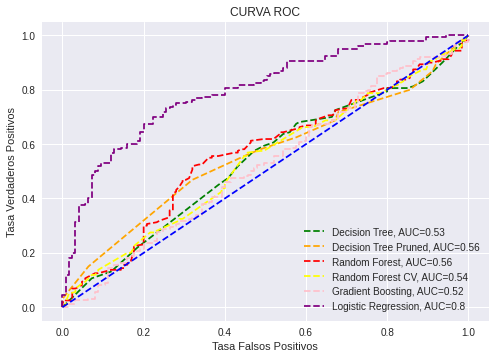

In [81]:
## Diagonal
#Probabilidad_Modelo1_test[::,1:2]
fpr, tpr, thresholds = roc_curve(y_test, Probabilidad_test_M1[:,1])
fpr1, tpr1, thresholds1 = roc_curve(y_test, Probabilidad_test_M2[:,1])
fpr2, tpr2, thresholds2 = roc_curve(y_test, Probabilidad_test_M3[:,1])
fpr3, tpr3, thresholds3 = roc_curve(y_test, Probabilidad_test_M4[:,1])
fpr4, tpr4, thresholds4 = roc_curve(y_test, Probabilidad_test_M5[:,1])
fpr5, tpr5, thresholds5 = roc_curve(y_test, Probabilidad_test)

AUC1=round(roc_auc_score(y_test, Probabilidad_test_M1[:,1]),2)
AUC2=round(roc_auc_score(y_test, Probabilidad_test_M2[:,1]),2)
AUC3=round(roc_auc_score(y_test, Probabilidad_test_M3[:,1]),2)
AUC4=round(roc_auc_score(y_test, Probabilidad_test_M4[:,1]),2)
AUC5=round(roc_auc_score(y_test, Probabilidad_test_M5[:,1]),2)
AUC6=round(roc_auc_score(y_test, Probabilidad_test),2)

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

import matplotlib.pyplot as plt
plt.style.use('seaborn')

plt.plot(fpr,tpr,linestyle="--",color="green",label="Decision Tree, AUC="+str(AUC1))
plt.plot(fpr1,tpr1,linestyle="--",color="orange",label="Decision Tree Pruned, AUC="+str(AUC2))
plt.plot(fpr2,tpr2,linestyle="--",color="red",label="Random Forest, AUC="+str(AUC3))
plt.plot(fpr3,tpr3,linestyle="--",color="yellow",label="Random Forest CV, AUC="+str(AUC4))
plt.plot(fpr4,tpr4,linestyle="--",color="pink",label="Gradient Boosting, AUC="+str(AUC5))
plt.plot(fpr5,tpr5,linestyle="--",color="purple",label="Logistic Regression, AUC="+str(AUC6))

plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title("CURVA ROC")
plt.xlabel("Tasa Falsos Positivos")
plt.ylabel("Tasa Verdaderos Positivos")
plt.legend()
plt.show()

In [82]:
AUC1

0.53

In [83]:
AUC2

0.56

In [84]:
AUC3

0.56

In [85]:
AUC4

0.54

In [86]:
AUC5

0.52

In [87]:
AUC6

0.8